In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Question 1  
(a)

In [2]:
auto = pd.read_csv('Auto.csv', na_values ='?')

<IPython.core.display.Javascript object>


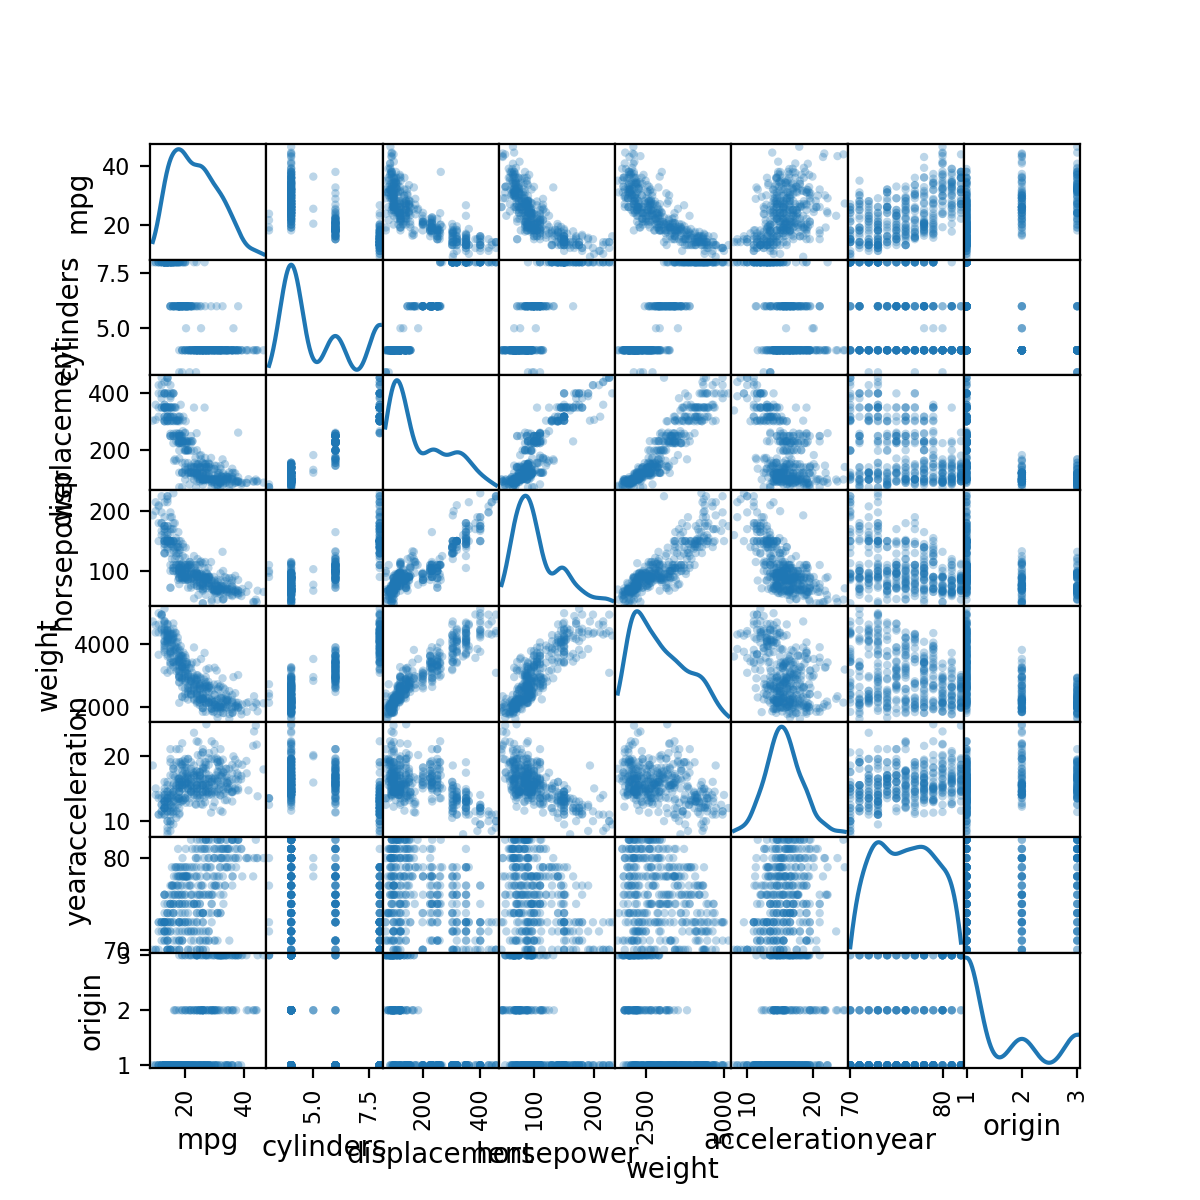

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20b97e80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a2265c6a0>]], dtype=object)

In [4]:
from pandas.plotting import scatter_matrix
%matplotlib notebook
scatter_matrix(auto, alpha = 0.3, figsize=(6, 6), diagonal='kde')

(c)

In [10]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


(d)

In [7]:
import numpy as np
import statsmodels.api as sm

/Users/apple/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [11]:
y = auto['mpg']
X = auto[['cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'year', 'origin']]
X = sm.add_constant(X)
lg = sm.OLS(y, X, missing='drop').fit()

In [12]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        23:36:10   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(i)  
beta_2 for displacement, beta_4 for weight, beta_6 for year and beta_7 for origin are statistically significant at 1% level.  
(ii)  
beta_1 for cylinders, beta_3 for horsepower and beta_5 for acceleration are not statistically significant at 10% level.  
(iii)   
Holding other variables constant, for every 1 year increase or decrease, mpg is expected to increase or decrease by 0.7508, respectively.

(e)

The three variables that look most likely to have a nonlinear relationship with mpg are acceleration, displacement and horsepower.

(i)

In [13]:
auto['acc_2'] = auto['acceleration'].apply(lambda x: x*x)
auto['disp_2'] = auto['displacement'].apply(lambda x: x*x)
auto['hp_2'] = auto['horsepower'].apply(lambda x: x*x)

In [14]:
y_2 = auto['mpg'] 
X_2 = auto[['cylinders', 'displacement', 'disp_2', 'horsepower', 'hp_2', 'weight', 'acceleration', 'acc_2', \
            'year', 'origin']]
X_2 = sm.add_constant(X_2)
lg_2 = sm.OLS(y_2, X_2, missing='drop').fit()

In [15]:
lg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     241.5
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          4.05e-158
Time:                        23:36:16   Log-Likelihood:                -970.53
No. Observations:                 392   AIC:                             1963.
Df Residuals:                     381   BIC:                             2007.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.9847      6.004      1.163      0.245      -4.821      18.790
cylinders        0.7388      0.310      2.384      0.018       0.129       1.348
displacement    -0.0700      0.016     -4.332      0.000      -0.102      -0.038
disp_2           0.0001   2.85e-05      4.090      0.000    6.04e-05       0.000
horsepower      -0.2221      0.039     -5.638      0.000      -0.300      -0.145
hp_2             0.0006      0.000      4.237      0.000       0.000       0.001
weight          -0.0029      0.001     -4.368      0.000      -0.004      -0.002
acceleration    -1.3518      0.538     -2.514      0.012      -2.409      -0.294
acc_2            0.0331      0.016      2.111      0.035       0.002       0.064
year             0.7495      0.045     16.716      0.000       0.661       0.838
origin           0.5737      0.268      2.138      0.033       0.046       1.101
==============================================================================
Omnibus:                       27.998   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.858
Skew:                           0.378   Prob(JB):                     6.09e-14
Kurtosis:                       4.776   Cond. No.                     2.89e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(i)  
The adjusted R-squared is 0.860. In part (d), the adjusted R-squared is 0.818, so it has been improved.  
(ii)  
The statistical significance of the displacement variable coefficient and the coefficient on its squared term has been greaty improved. In part(e), both coefficients have p-value 0.000, while in part (d), the coefficient of displacement variable has p-value 0.008.  
(iii)   
The statistical significance of the cylinders variable in part (e) has 0.018 as p-value, which has greatly improved from 0.128 as p-value from part (d)

(f)

In [16]:
mpg_pred = lg_2.predict(exog=[1, 6, 200, 200*200, 100, 100*100, 3100, 15.1, 15.1*15.1, 99, 1])

In [17]:
mpg_pred

array([ 38.49803518])

The predicted mpg is 38.5 miles per gallon.

Question 2

(a)

In [18]:
import math
dist_1 = math.sqrt((0 - 0)**2 + (0 - 3)**2 + (0 - 0)**2)
dist_2 = math.sqrt((0 - 2)**2 + (0 - 0)**2 + (0 - 0)**2)
dist_3 = math.sqrt((0 - 0)**2 + (0 - 1)**2 + (0 - 3)**2)
dist_4 = math.sqrt((0 - 0)**2 + (0 - 1)**2 + (0 - 2)**2)
dist_5 = math.sqrt((0 - (-1))**2 + (0 - 0)**2 + (0 - 1)**2)
dist_6 = math.sqrt((0 - 1)**2 + (0 - 1)**2 + (0 - 1)**2)
print("The Euclidean distance between observation 1 and the test point is", dist_1)
print("The Euclidean distance between observation 2 and the test point is", dist_2)
print("The Euclidean distance between observation 3 and the test point is", dist_3)
print("The Euclidean distance between observation 4 and the test point is", dist_4)
print("The Euclidean distance between observation 5 and the test point is", dist_5)
print("The Euclidean distance between observation 6 and the test point is", dist_6)

The Euclidean distance between observation 1 and the test point is 3.0
The Euclidean distance between observation 2 and the test point is 2.0
The Euclidean distance between observation 3 and the test point is 3.1622776601683795
The Euclidean distance between observation 4 and the test point is 2.23606797749979
The Euclidean distance between observation 5 and the test point is 1.4142135623730951
The Euclidean distance between observation 6 and the test point is 1.7320508075688772


(b)  
When K = 1, we choose observation 5, which has the nearest distance to the test point. So our KNN prediction with K = 1 is Y = Green.

(c)  
When K = 3, we choose observation 2 (Y = Red), 5 (Y = Green) and 6 (Y = Red), which have the 3 nearest distances to the test point. So our KNN prediction with K = 3 is Y = Red.

(d)  
We would expect the best value for K to be small, because as K get larger, the KNN estimation involves more linear characteristics.

(e)

In [19]:
import sklearn as sk
from sklearn import neighbors
dic = {'X1' : [0, 2, 0 , 0, -1, 1], 'X2' : [3, 0, 1, 1, 0, 1], \
           'X3' : [0, 0, 3, 2, 1, 1], 'Y' : ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']}
knn = pd.DataFrame.from_dict(data=dic)
y = knn['Y']
x = np.column_stack((knn['X1'], knn['X2'], knn['X3']))
knn_classifier = sk.neighbors.KNeighborsClassifier(n_neighbors=2)
knn_pred = knn_classifier.fit(x, y)
print('KNN classifier of the test point X1 = X2 = X3 = 1 with K = 2 is', knn_pred.predict([(1, 1, 1)]))

KNN classifier of the test point X1 = X2 = X3 = 1 with K = 2 is ['Green']


Question 3

(a)

In [20]:
auto.shape

(397, 12)

In [21]:
auto_2 = auto.iloc[0:397, 0:(len(auto.columns)-1)]
median = auto_2['mpg'].median()
auto_2['mpg_high'] = auto_2['mpg'].apply(lambda x: 1 if x >= median else 0)
auto_2

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,acc_2,disp_2,mpg_high
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,144.00,94249.0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,132.25,122500.0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,121.00,101124.0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,144.00,92416.0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,110.25,91204.0,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500,100.00,184041.0,0
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala,81.00,206116.0,0
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii,72.25,193600.0,0
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina,100.00,207025.0,0
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl,72.25,152100.0,0


In [22]:
y3 = auto_2['mpg_high']
X3 = np.column_stack((auto_2['cylinders'], auto_2['displacement'], auto_2['horsepower'], auto_2['weight'], 
                     auto_2['acceleration'], auto_2['year'], auto_2['origin']))
X3 = sm.add_constant(X3)

In [23]:
logit = sm.Logit(y3, X3, missing="drop").fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sat, 03 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        23:36:31   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.1549      5.764     -2.976      0.003     -28.452      -5.858
x1            -0.1626      0.423     -0.384      0.701      -0.992       0.667
x2             0.0021      0.012      0.174      0.862      -0.021       0.026
x3            -0.0410      0.024     -1.718      0.086      -0.088       0.006
x4            -0.0043      0.001     -3.784      0.000      -0.007      -0.002
x5             0.0161      0.141      0.114      0.910      -0.261       0.293
x6             0.4295      0.075      5.709      0.000       0.282       0.577
x7             0.4773      0.362      1.319      0.187      -0.232       1.187
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Weight and Year are significant at 5% level.

(b)

In [42]:
from sklearn.cross_validation import train_test_split
auto2 = auto_2.dropna(axis = 0, how = 'any')
X3_2 = np.column_stack((auto2['cylinders'], auto2['displacement'], auto2['horsepower'], auto2['weight'], \
                        auto2['acceleration'], auto2['year'], auto2['origin']))
y3_2 = auto2['mpg_high']
X_train, X_test, y_train, y_test = train_test_split(X3_2, y3_2, test_size = .5,random_state=10)
X_train = sm.add_constant(X_train)

(c)

In [43]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
logit = LogReg.fit(X_train, y_train)
print('The estimated intercept is', logit.intercept_, 'and the estimated coefficients beta_1, \
beta_2, beta_3, beta_4, beta_5, beta_6, beta_7 are,', logit.coef_, ' respectively.')

The estimated intercept is [-0.15403785] and the estimated coefficients beta_1, beta_2, beta_3, beta_4, beta_5, beta_6, beta_7 are, [[-0.15403785 -1.09063892  0.01293466 -0.03644323 -0.00507603 -0.19746618
   0.32575605 -0.1339177 ]]  respectively.


(d)

In [49]:
from sklearn.metrics import confusion_matrix
X_test = sm.add_constant(X_test)
y_pred = LogReg.predict(X_test)
c_m = confusion_matrix(y_test, y_pred)
print('The confusion matrix is')
print(c_m)

The confusion matrix is
[[86 13]
 [11 86]]


In [50]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print('The classification report is')
print(cr)

The classification report is
             precision    recall  f1-score   support

          0       0.89      0.87      0.88        99
          1       0.87      0.89      0.88        97

avg / total       0.88      0.88      0.88       196



This model predict both low mpg (mpg high=0) and high mpg (mpg high=1) very well.

References:   
1. http://www.statsmodels.org/dev/examples/notebooks/generated/predict.html. Accessed Feb. 3rd, 2018.
2. http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html. Accessed Feb. 3rd, 2018.